In [73]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Display images

Text(0.5, 1.0, 'Skewed Image')

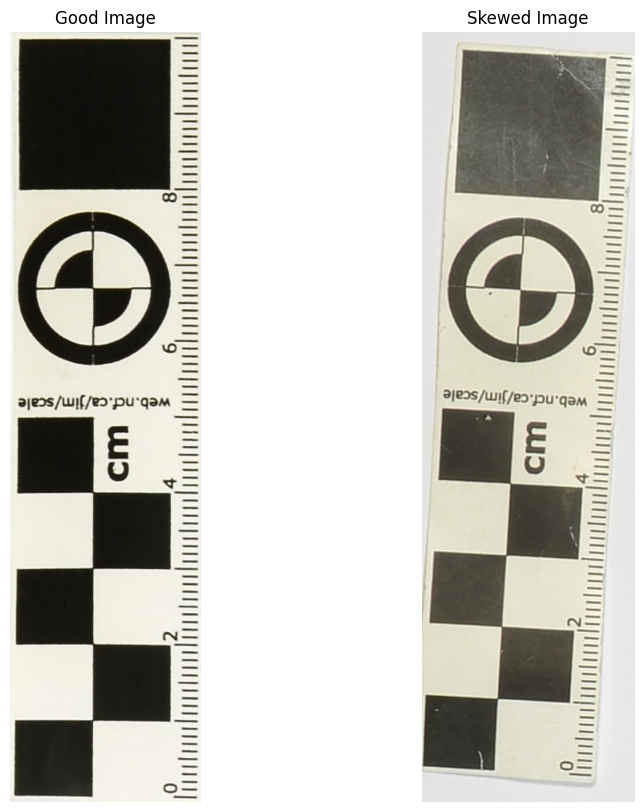

In [74]:
good_img_path = rf"C:\Users\buyse\Downloads\1805284920_scale_only.jpg"
skewed_img_path = rf"C:\Users\buyse\Workspace\NTNU\models\runs\detect\predict2\crops\scale_random\labels.jpg"

good_img = cv2.imread(good_img_path, cv2.IMREAD_COLOR)
good_img = cv2.cvtColor(good_img, cv2.COLOR_BGR2RGB)

skewed_img = cv2.imread(skewed_img_path, cv2.IMREAD_COLOR)
skewed_img = cv2.cvtColor(skewed_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(good_img) ;plt.title("Good Image")
plt.subplot(122); plt.axis('off'); plt.imshow(skewed_img); plt.title("Skewed Image")

Finding keypoints in both images

In [75]:
# convert to grayscale
good_img_gray = cv2.cvtColor(good_img, cv2.COLOR_RGB2GRAY)
skewed_img_gray = cv2.cvtColor(skewed_img, cv2.COLOR_RGB2GRAY)

# detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(good_img_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(skewed_img_gray, None)

# display
good_img_keypoints = cv2.drawKeypoints(good_img, keypoints1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
skewed_img_keypoints = cv2.drawKeypoints(skewed_img, keypoints2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Skewed Image')

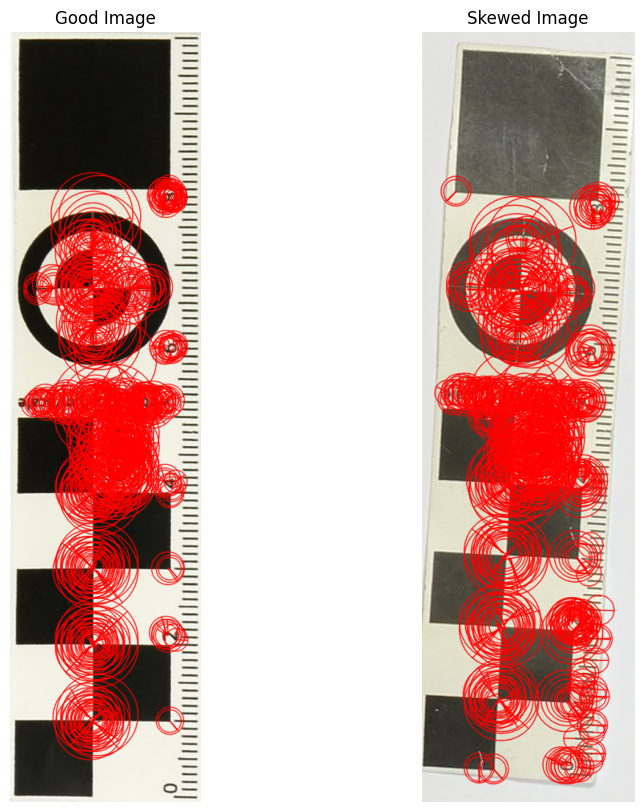

In [76]:
plt.figure(figsize=[10,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(good_img_keypoints) ;plt.title("Good Image")
plt.subplot(122); plt.axis('off'); plt.imshow(skewed_img_keypoints); plt.title("Skewed Image")

Match keypoints in th two images

In [77]:
# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
matches = sorted(matches, key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Good Matches')

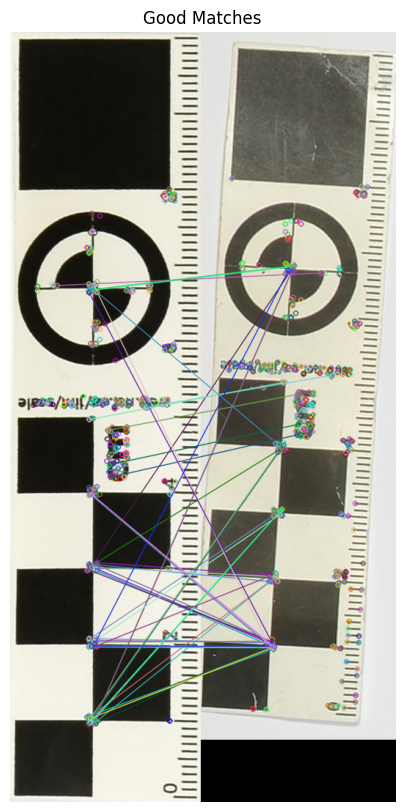

In [78]:
im_matches = cv2.drawMatches(good_img, keypoints1, skewed_img, keypoints2, matches, None)

plt.figure(figsize=[10,10]);
plt.imshow(im_matches); plt.axis('off'); plt.title("Good Matches")

Find homography

In [79]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Warp image

Text(0.5, 1.0, 'Skewed Image Aligned')

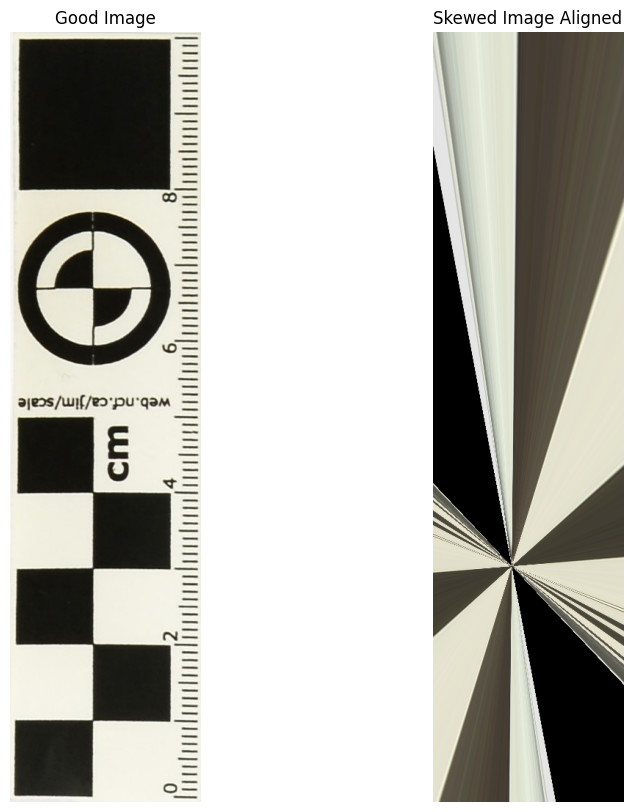

In [80]:
# Use homography to warp image
height, width, channels = good_img.shape
im1Reg = cv2.warpPerspective(skewed_img, h, (width, height))

# Display images
plt.figure(figsize=[10,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(good_img) ;plt.title("Good Image")
plt.subplot(122); plt.axis('off'); plt.imshow(im1Reg); plt.title("Skewed Image Aligned")